## Лабораторная работа №1. Создание "истории о данных"
### Задание:

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
1. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
1. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
1. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
1. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../dataset.csv', sep=',', decimal=',')
data = data.dropna()
dt = data.rename(columns={
    "Area (sq. mi.)": "Area",
    "Pop. Density (per sq. mi.)" : "Density",
    "Coastline (coast/area ratio)": "Coastline (coast/area ratio)",
    "Infant mortality (per 1000 births)": "Infant mortality",
    "GDP ($ per capita)": "GDP",
    "Literacy (%)": "Literacy",
    "Phones (per 1000)": "Phones"
})

In [3]:
dt.describe()

,Population,Area,Density,Coastline (coast/area ratio),Net migration,Infant mortality,GDP,Literacy,Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [4]:
dt.dtypes

Country                          object
Region                           object
Population                        int64
Area                              int64
Density                         float64
Coastline (coast/area ratio)    float64
Net migration                   float64
Infant mortality                float64
GDP                             float64
Literacy                        float64
Phones                          float64
Arable (%)                      float64
Crops (%)                       float64
Other (%)                       float64
Climate                         float64
Birthrate                       float64
Deathrate                       float64
Agriculture                     float64
Industry                        float64
Service                         float64
dtype: object

<AxesSubplot:>

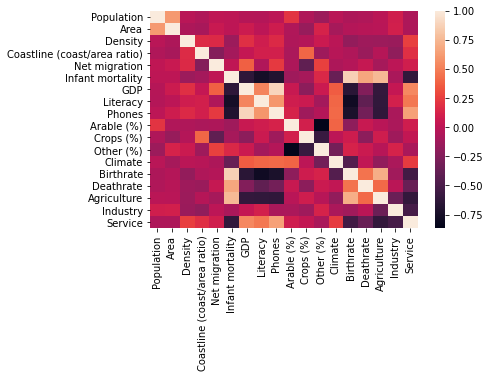

In [5]:
sns.heatmap(dt.corr())

<ipython-input-6-096daee118fd>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


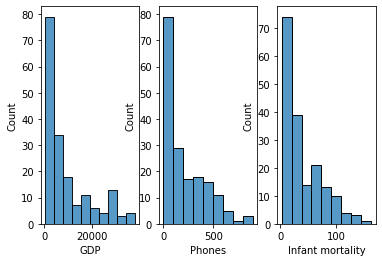

In [6]:
fig, ax = plt.subplots(1, 3)
sns.histplot(dt['GDP'], ax=ax[0])
sns.histplot(dt['Phones'], ax=ax[1])
sns.histplot(dt['Infant mortality'], ax=ax[2])
fig.show()

<AxesSubplot:xlabel='Birthrate', ylabel='Region'>

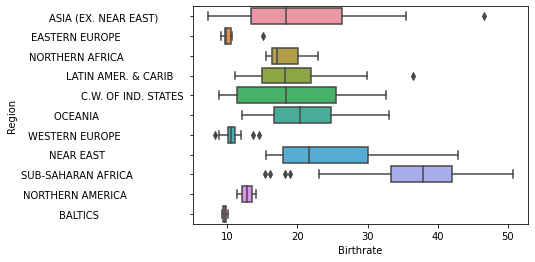

In [7]:
sns.boxplot(x=dt["Birthrate"], y=dt["Region"])

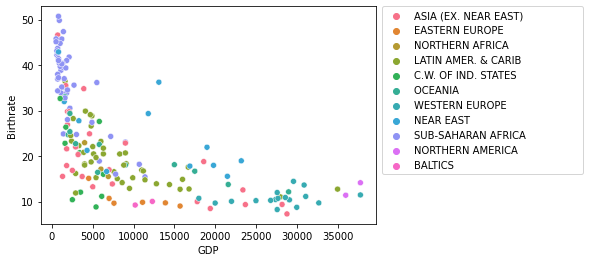

In [8]:
sns.scatterplot(y=dt["Birthrate"], x=dt["GDP"], hue=dt["Region"], legend=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='Birthrate', ylabel='GDP'>

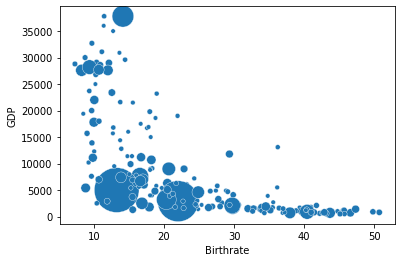

In [9]:
sns.scatterplot(data=dt, x="Birthrate", y="GDP", size="Population", legend=False, sizes=(20, 2000))